In [11]:
import json

with open('results.json') as f:
    results = json.load(f)

In [12]:
import matplotlib.pyplot as plt
import numpy as np

In [13]:
def plot_instances(features):
    fig, axes = plt.subplots(1, 20)
    fig.set_size_inches(30, 5)
    for i, ax in enumerate(axes):
        image = plt.imread(features[i][0])
        label = float(features[i][1])
        # image = image / 255.0
        ax.set_title(f"{label:.3f}")
        ax.imshow(image)
        ax.set_axis_off()
    plt.show()

In [14]:
def visualize_concept(concept_id=0):
    print(f"Concept #{concept_id}")
    print()
    pair = results[concept_id]
    print(pair["concept"])
    plot_instances(pair["feature"])

Concept #0

[['red', 0.8034484492084845], ['four', 0.7673803029021596], ['blue', 0.2977571710671594], ['three', 0.19378580837775536], ['angle', 0.10882493027569196], ['green', 0.0793966192665048], ['round', 0.057452873186761046], ['this', 0.037152444799733536], ['canvas', 0.0363232710387376], ['shape', 0.03316872542866614]]


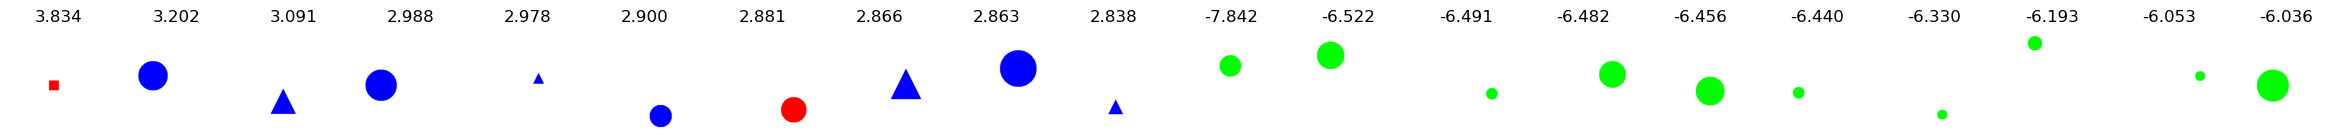

Concept #1

[['blue', 0.7411041754048046], ['three', 0.2992350828720302], ['green', 0.16733513412679113], ['blank', 0.13122698588534146], ['white', 0.1295298958155164], ['this', 0.08013407756703171], ['left', 0.06247600155947604], ['rotate', 0.059144545088942464], ['four', 0.05786851950110943], ['round', 0.054784495116976216]]


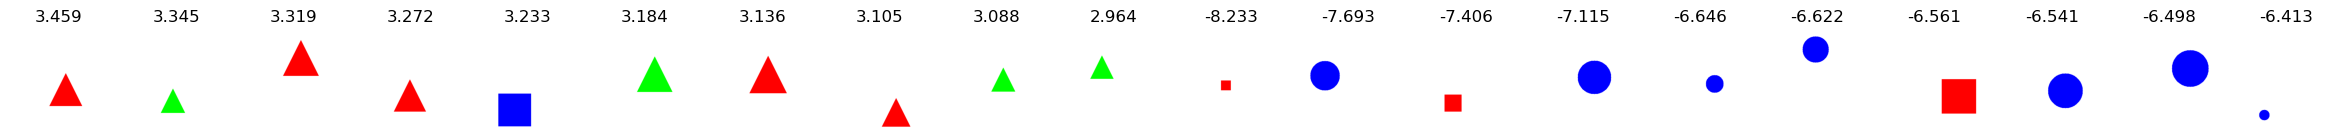

Concept #2

[['three', 0.7004521643243184], ['green', 0.41466728620897464], ['round', 0.30056908305098373], ['is', 0.2925338327400083], ['red', 0.20527242555214864], ['blue', 0.11272842063136944], ['color', 0.08271721093271805], ['four', 0.07457838564263126], ['shape', 0.05338864385738444], ['has', 0.03738636954695108]]


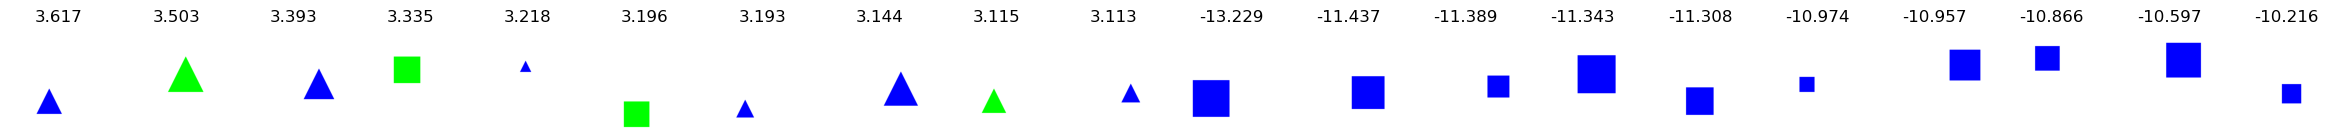

Concept #3

[['four', 0.9712507097701716], ['green', 0.43176668604033264], ['round', 0.24903048886273935], ['three', 0.19952294960981462], ['blue', 0.09196951289252356], ['this', 0.08752992995800123], ['left', 0.06373323262809961], ['red', 0.058285347286165065], ['white', 0.044874842583920875], ['canvas', 0.04411402595485624]]


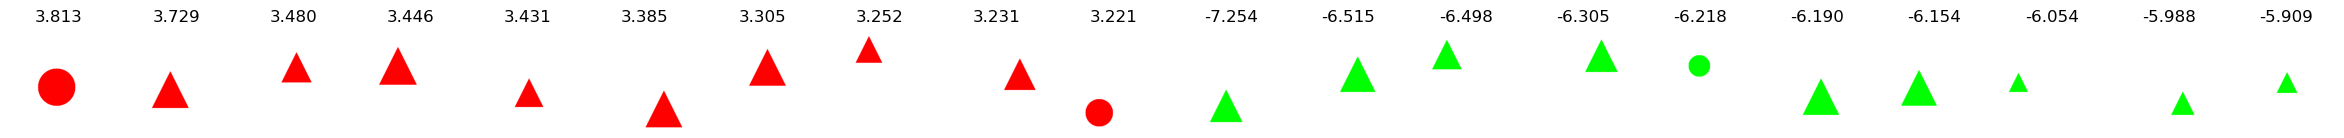

Concept #4

[['green', 0.7480923557669167], ['four', 0.48072394035696014], ['blue', 0.46941871754522246], ['angle', 0.22916684131312176], ['round', 0.06366524210093709], ['color', 0.06339409898986742], ['has', 0.058987243647679564], ['three', 0.04806250972839875], ['red', 0.04560905550644408], ['is', 0.04092322032883521]]


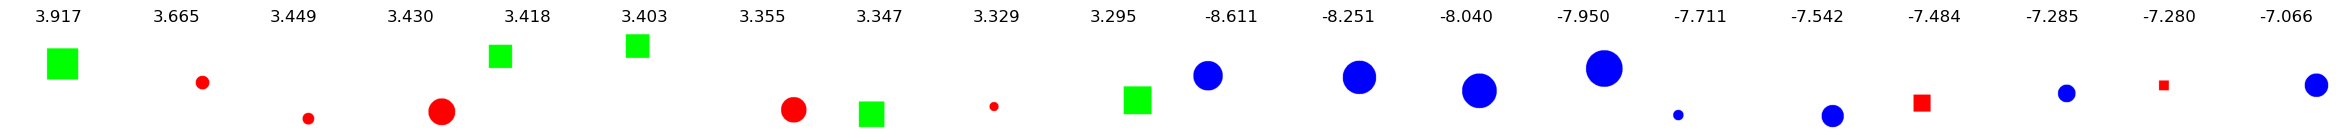

Concept #5

[['blue', 0.7942780122524354], ['four', 0.4431489132889887], ['green', 0.30736280482232087], ['color', 0.15876306823144357], ['round', 0.08372592357842903], ['is', 0.06766074892224336], ['three', 0.0674675098347773], ['angle', 0.06303588560161491], ['left', 0.04103829288453143], ['red', 0.03904595492952844]]


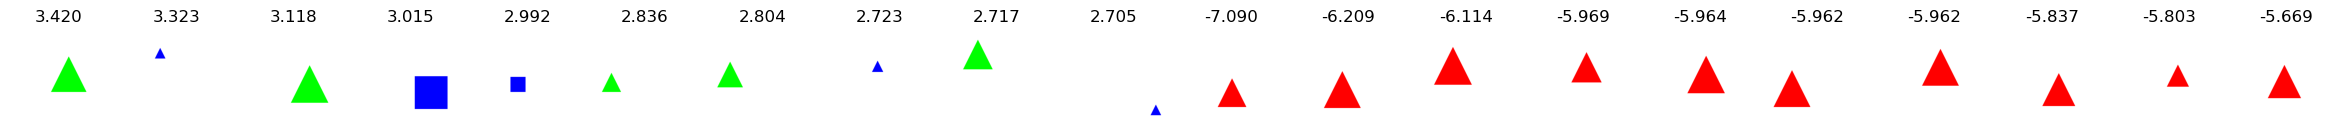

Concept #6

[['red', 0.9556427159929664], ['blue', 0.3439595479548462], ['four', 0.16910074361092675], ['shape', 0.12194950836672773], ['green', 0.11925069335999527], ['angle', 0.07965213882668716], ['has', 0.07661661401360742], ['is', 0.07169272937183457], ['rotate', 0.06841237655072267], ['canvas', 0.03870032910007711]]


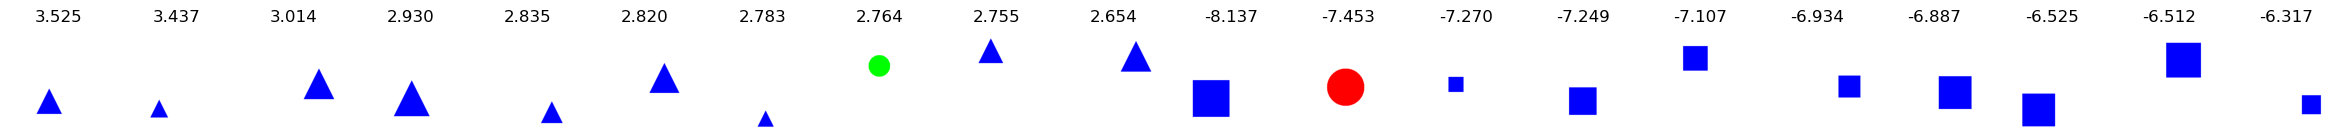

Concept #7

[['green', 0.7088945577784282], ['four', 0.4227080549166454], ['red', 0.3711760709440805], ['round', 0.19508950216014212], ['three', 0.1215535925716404], ['angle', 0.08316826262488598], ['color', 0.08279000778801153], ['this', 0.06633324059569416], ['has', 0.03789199680559398], ['blue', 0.03473844485493695]]


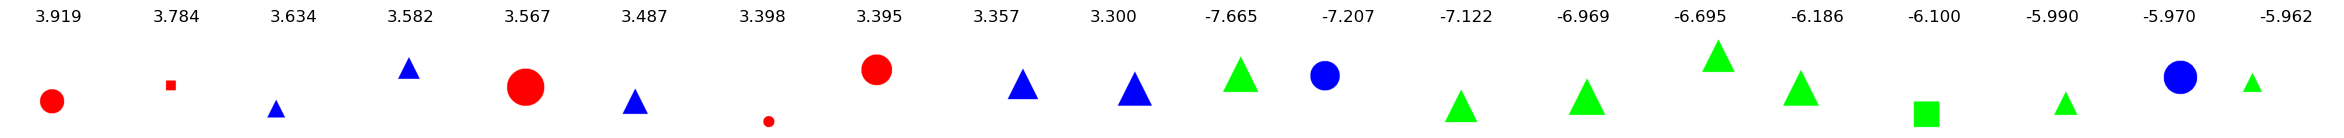

Concept #8

[['red', 0.6781039466702841], ['blue', 0.4786309271323972], ['four', 0.38685453255486685], ['round', 0.16363847670031756], ['color', 0.11421433073900095], ['angle', 0.11253370874054064], ['green', 0.11188636932188903], ['three', 0.057143380556528164], ['this', 0.04017653104452906], ['is', 0.039976159740633115]]


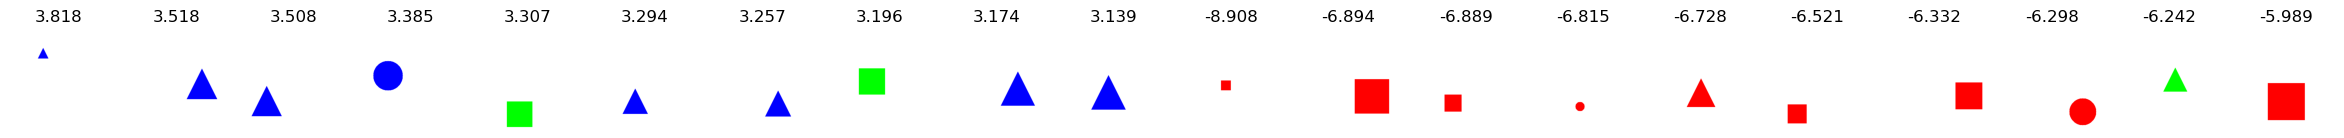

Concept #9

[['four', 0.585479192714381], ['blue', 0.33818788698049096], ['green', 0.2505048618326342], ['round', 0.23665148979280054], ['three', 0.20454464755891785], ['color', 0.13870657630325334], ['is', 0.09372636020425859], ['red', 0.06502732752663333], ['angle', 0.05278446201871081], ['left', 0.0491915807124068]]


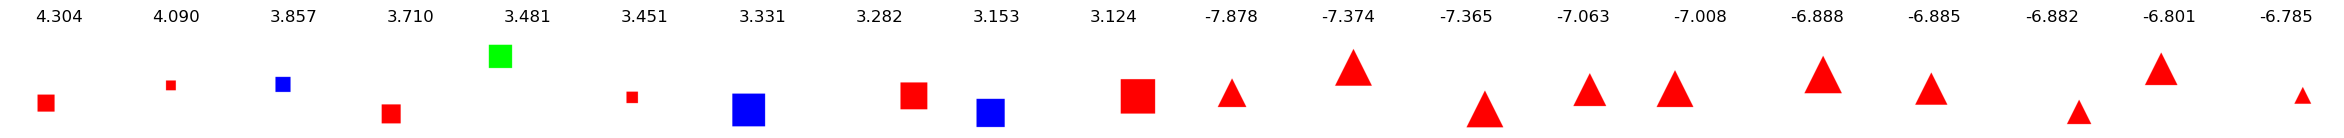

In [15]:
for i in range(10):
    visualize_concept(i)